In [181]:
%matplotlib inline

In [182]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nose.tools
# Write your imports here

# Data Visualization and Exploratory Data Analysis Lab
## Visualizing and exploring data. Data mining process as a whole

### Problem 1. Read the dataset (1 point)
You'll be exploring data about people's income. Your task is to understand whether there are significant differences in the lifestyle of lower- vs. higher-income groups.

Read the dataset located [here](https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data). The information file is [here](https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names). Save it into the variable `income_data`. Change the column names to what you like. The last column is related to the income class.

Get acquainted with the information file well before starting work.

You don't need to clean the dataset.

In [183]:
path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
income_data = pd.read_csv(path, header=None)
income_data.columns = ['age','workclass','final_weight','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','yearly_income']

In [184]:
nose.tools.assert_is_not_none(income_data)

### Problem 2. High income (1 point)
How many people have high income (over 50 000 USD per year)? Write a function to return the value. The function should accept the dataframe as a parameter. Work with that parameter.

In [185]:
def get_num_people_with_high_income(dataframe):
    high_income_dataframe = dataframe[dataframe["capital_gain"] > 50000]
    return high_income_dataframe

In [186]:
get_num_people_with_high_income(income_data)

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,yearly_income
1246,54,Self-emp-inc,166459,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,>50K
1368,52,Private,152234,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,99999,0,40,Japan,>50K
1482,53,Self-emp-inc,263925,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,99999,0,40,United-States,>50K
1528,52,Private,118025,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,50,United-States,>50K
1616,46,Private,370119,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31828,47,Private,155664,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,55,United-States,>50K
31972,43,Self-emp-inc,62026,Prof-school,15,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,40,United-States,>50K
32090,66,Private,115498,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,55,?,>50K
32238,47,Private,294913,Prof-school,15,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,40,United-States,>50K


In [187]:
# This cell contains hidden tests

### Problem 3. Capital gain: thresholding (1 point)
Plot a histogram of the capital gain. You can see that there are many people with relatively low gains and a few people - with very high gains.

In [188]:
income_data.shape

(32561, 15)

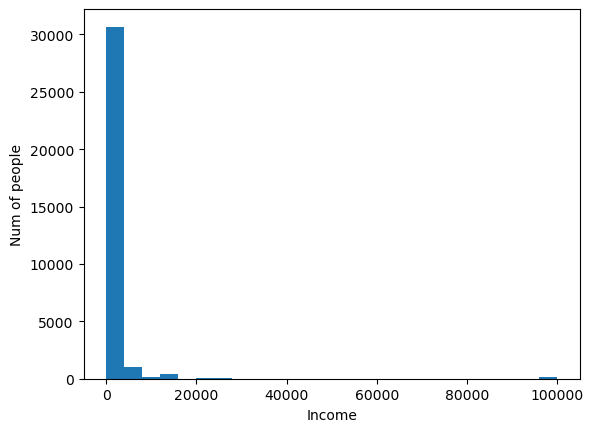

In [189]:
plt.hist(income_data['capital_gain'], bins = 25)
plt.xlabel('Income')
plt.ylabel('Num of people')
plt.show()

In [190]:
income_data['capital_gain'].mean()

1077.6488437087312

In [191]:
income_data[income_data['capital_gain'] >= 50000]

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,yearly_income
1246,54,Self-emp-inc,166459,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,>50K
1368,52,Private,152234,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,99999,0,40,Japan,>50K
1482,53,Self-emp-inc,263925,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,99999,0,40,United-States,>50K
1528,52,Private,118025,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,50,United-States,>50K
1616,46,Private,370119,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31828,47,Private,155664,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,55,United-States,>50K
31972,43,Self-emp-inc,62026,Prof-school,15,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,40,United-States,>50K
32090,66,Private,115498,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,55,?,>50K
32238,47,Private,294913,Prof-school,15,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,40,United-States,>50K


In [192]:
income_data['capital_gain'][income_data['capital_gain'] >= 60000].count()

159

Write a function which accepts a dataframe and a capital gain value (in USD) and returns how many people are there with **greater than or equal to** that threshold gain.

In [193]:
def get_num_people_with_higher_gain(dataframe, threshold_gain):
    count_of_people = dataframe['capital_gain'][dataframe['capital_gain'] >= threshold_gain].count()
    return count_of_people

In [194]:
get_num_people_with_higher_gain(income_data, 60000)

159

In [195]:
nose.tools.assert_equal(get_num_people_with_higher_gain(income_data, 60000), 159)

Create a pie chart of the number of people by marital status.

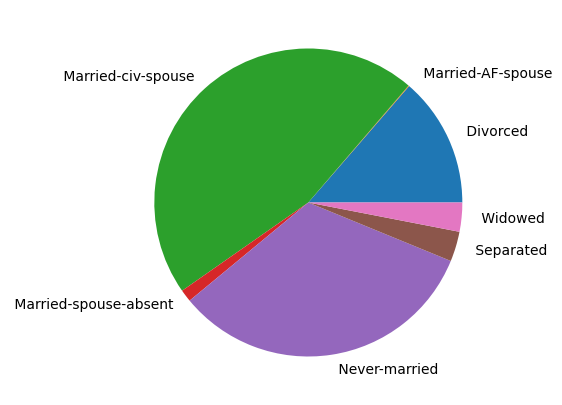

In [196]:
groupby_marital_status = income_data.groupby(['marital_status']).size()
plt_marital_status_count = groupby_marital_status.plot.pie(y='marital_status', figsize=(5, 5))

In [197]:
groupby_marital_status

marital_status
 Divorced                  4443
 Married-AF-spouse           23
 Married-civ-spouse       14976
 Married-spouse-absent      418
 Never-married            10683
 Separated                 1025
 Widowed                    993
dtype: int64

In [198]:
status = ''
num_people = 0
for i, j in groupby_marital_status.items():
    if num_people < j:
        num_people = j
        status = i
print(status)
print(num_people)

 Married-civ-spouse
14976


### Problem 4. Marital status (2 points)
Which type of marital status is the most prominent (i.e. has the most people)? How many are there? Write a function that **calculates and returns the two answers**. 

In [199]:
def most_prominent_marital_status(dataframe):
    status = ''
    num_people = 0
    groupby_marital_status = dataframe.groupby(['marital_status']).size()
    for i, j in groupby_marital_status.items():
        if num_people < j:
            num_people = j
            status = i
    return (status, num_people)

In [200]:
(status, num_people) = most_prominent_marital_status(income_data)
nose.tools.assert_not_equal(status, "")
nose.tools.assert_greater(num_people, 10000)

### Problem 5. Age groups (1 point)
Create a histogram of all people's ages. Use the default settings. Add the label "Age" on the x-axis and "Count" on the y-axis.

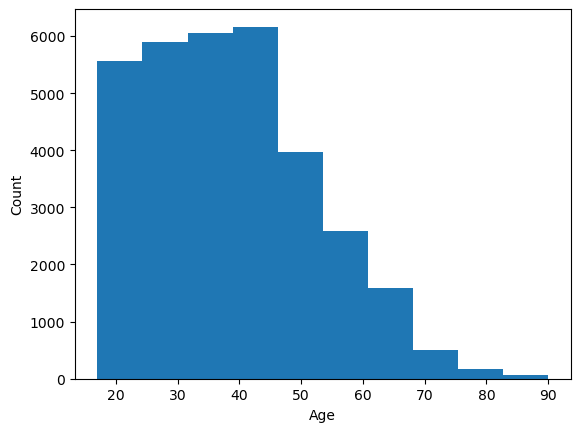

In [201]:
plt.hist(income_data['age'])

plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Let's get another view of the data. Split the ages into three:
1. Young people: $\text{age} \le 30$
2. Middle-aged people: $30 < \text{age} \le 60$
3. Old people: $60 < \text{age}$

Return the counts in the following function. Which age group has the most people? How many are there?

In [202]:
Young = income_data[(income_data.age <= 30)]
Middle_aged = income_data[(income_data.age > 30) & (income_data.age <= 60)]
Old = income_data[(income_data.age > 60)]

In [203]:
def get_num_people_by_age_category(dataframe):
    young, middle_aged, old = (0, 0, 0)
    
    young = dataframe[(dataframe.age <= 30)].size
    middle_aged = dataframe[(dataframe.age > 30) & (dataframe.age <= 60)].size
    old = dataframe[(dataframe.age > 60)].size
    
    return young, middle_aged, old

In [204]:
get_num_people_by_age_category(income_data)

(158580, 294855, 34980)

In [205]:
young, middle_aged, old = get_num_people_by_age_category(income_data)
nose.tools.assert_greater(young, 0)
nose.tools.assert_greater(middle_aged, 0)
nose.tools.assert_greater(old, 0)

Now we can create a bar chart. Execute the code below to see it.

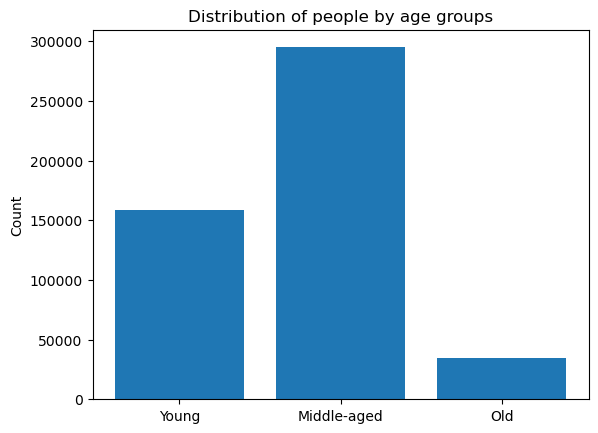

In [206]:
plt.title("Distribution of people by age groups")
plt.bar(range(3), [young, middle_aged, old])
plt.xticks(range(3), ["Young", "Middle-aged", "Old"])
plt.ylabel("Count")
plt.show()

### Problem 6. Native country (2 points)
Have a look at the native country of the people. The highest number of people are, as expected, from the US. What country makes for **the second highest** number of people? How many are they? Write a function to **calculate** and return the answer given a dataframe. DO NOT hardcode the answer, e.g. `return "Germany"`.

In [207]:
income_data['native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [208]:
income_data['native_country'] = income_data['native_country'].replace(' ?', np.nan) # replace ? with nan

In [209]:
income_data['native_country'] = income_data['native_country'].str.strip() #remove the blanks from the values

In [210]:
income_data['native_country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', nan, 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [211]:
highest_population = income_data.groupby(['native_country']).size().reset_index(name='counts')

In [212]:
sorted_highest_population = highest_population.sort_values(by='counts', ascending=False)

In [213]:
second_highest = highest_population.iloc[1, :]

In [214]:
second_highest['counts']

121

In [215]:
def get_second_highest_num_people(dataframe):
    num_people, country = 0, ""
    
    highest_population = dataframe.groupby(['native_country']).size().reset_index(name='counts')
    sorted_highest_population = highest_population.sort_values(by='counts', ascending=False)
    second_highest = sorted_highest_population.iloc[1, :]
    num_people = second_highest['counts']
    country = second_highest['native_country']
    
    return num_people, country

In [216]:
get_second_highest_num_people(income_data)

(643, 'Mexico')

In [217]:
num_people, country = get_second_highest_num_people(income_data)
nose.tools.assert_greater(num_people, 0)
nose.tools.assert_not_equal(country, "")

### Problem 7. Busiest occupations (2 points)
Which people are most overworked? Group all data by occupation and calculate the mean hours per week for each group.

Write a function that **calculates and returns** all mean hours per week as a `Series`. Sort the results in descending order (most hours to fewest hours).

In [218]:
income_data['occupation'] = income_data['occupation'].str.strip() #remove the blanks from the values
income_data['occupation'] = income_data['occupation'].replace('?', np.nan) # replace ? with nan

In [219]:
mean_hours_per_week = income_data.groupby('occupation')['hours_per_week'].mean()

In [220]:
mean_hours_per_week.sort_values(ascending=False)

occupation
Farming-fishing      46.989940
Exec-managerial      44.987703
Transport-moving     44.656230
Protective-serv      42.870570
Prof-specialty       42.386715
Craft-repair         42.304221
Sales                40.781096
Machine-op-inspct    40.755744
Armed-Forces         40.666667
Tech-support         39.432112
Handlers-cleaners    37.947445
Adm-clerical         37.558355
Other-service        34.701669
Priv-house-serv      32.885906
Name: hours_per_week, dtype: float64

In [221]:
def get_mean_working_hours_by_occupation(dataframe):
    
    mean_hours_per_week = dataframe.groupby('occupation')['hours_per_week'].mean()
    sorted_mean_hours_per_week = mean_hours_per_week.sort_values(ascending=False)
    
    return sorted_mean_hours_per_week

In [222]:
hours = get_mean_working_hours_by_occupation(income_data)
print(hours)
nose.tools.assert_almost_equal(hours["Handlers-cleaners"], 37.95, delta = 0.01)

occupation
Farming-fishing      46.989940
Exec-managerial      44.987703
Transport-moving     44.656230
Protective-serv      42.870570
Prof-specialty       42.386715
Craft-repair         42.304221
Sales                40.781096
Machine-op-inspct    40.755744
Armed-Forces         40.666667
Tech-support         39.432112
Handlers-cleaners    37.947445
Adm-clerical         37.558355
Other-service        34.701669
Priv-house-serv      32.885906
Name: hours_per_week, dtype: float64


Finally, let's plot a bar chart. Check the values carefully. If your do not match, feel free to edit the chart generation code below.

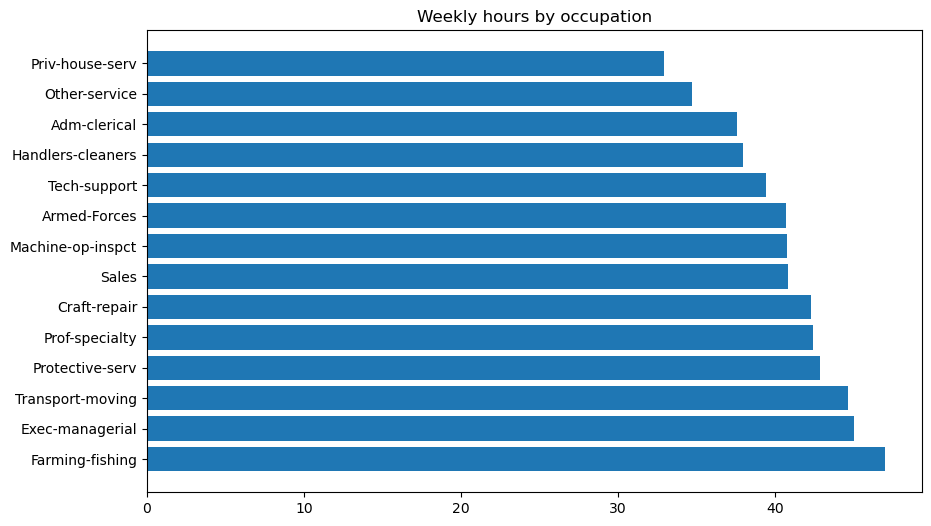

In [223]:
plt.figure(figsize = (10, 6))
plt.title("Weekly hours by occupation")
plt.barh(range(len(hours)), hours)
plt.yticks(list(range(len(hours))), hours.index)
plt.show()